# Logistic Regression Project #2

We want to build a classifier to predict wether a given user clicked on an Advertisement.

## Data and setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

### Data

The `advertising.csv` dataset contains the following features:

- `Daily Time Spent on Site`: consumer time on site in minutes
- `Age`: customer age in years
- `Area Income`: Avg. Income of geographical area of consumer
- `Daily Internet Usage`: Avg. minutes a day consumer is on the internet
- `Ad Topic Line`: Headline of the advertisement
- `City`: City of consumer
- `Male`: Whether or not consumer was male
- `Country`: Country of consumer
- `Timestamp`: Time at which consumer clicked on Ad or closed window
- `Clicked on Ad`: 0 or 1 indicated clicking on Ad

In [2]:
ad_data = pd.read_csv('../data/advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## EDA


/home/brunozimpel/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

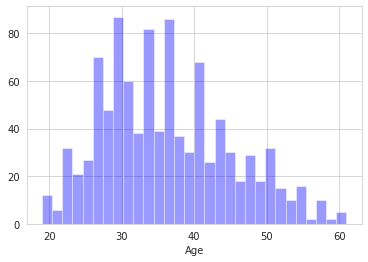

In [6]:
sns.set_style('whitegrid')
sns.distplot(ad_data['Age'],kde=False,color='blue',bins=30)

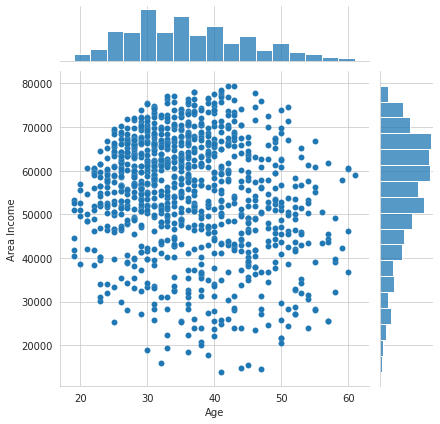

In [7]:
sns.jointplot(x = 'Age', y = 'Area Income', data = ad_data, linewidth=0.1)

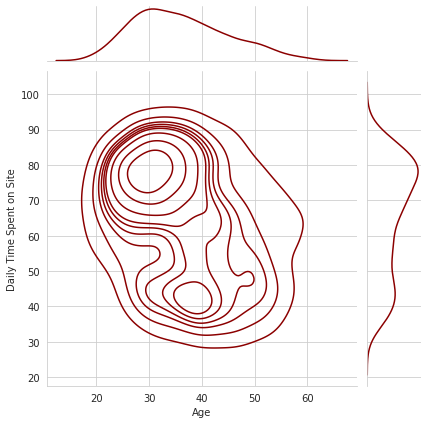

In [8]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color = 'darkred',kind='kde')

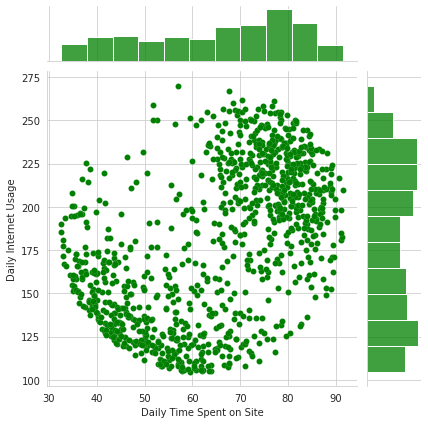

In [9]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',
              data=ad_data,color = 'green',linewidth=0.1)

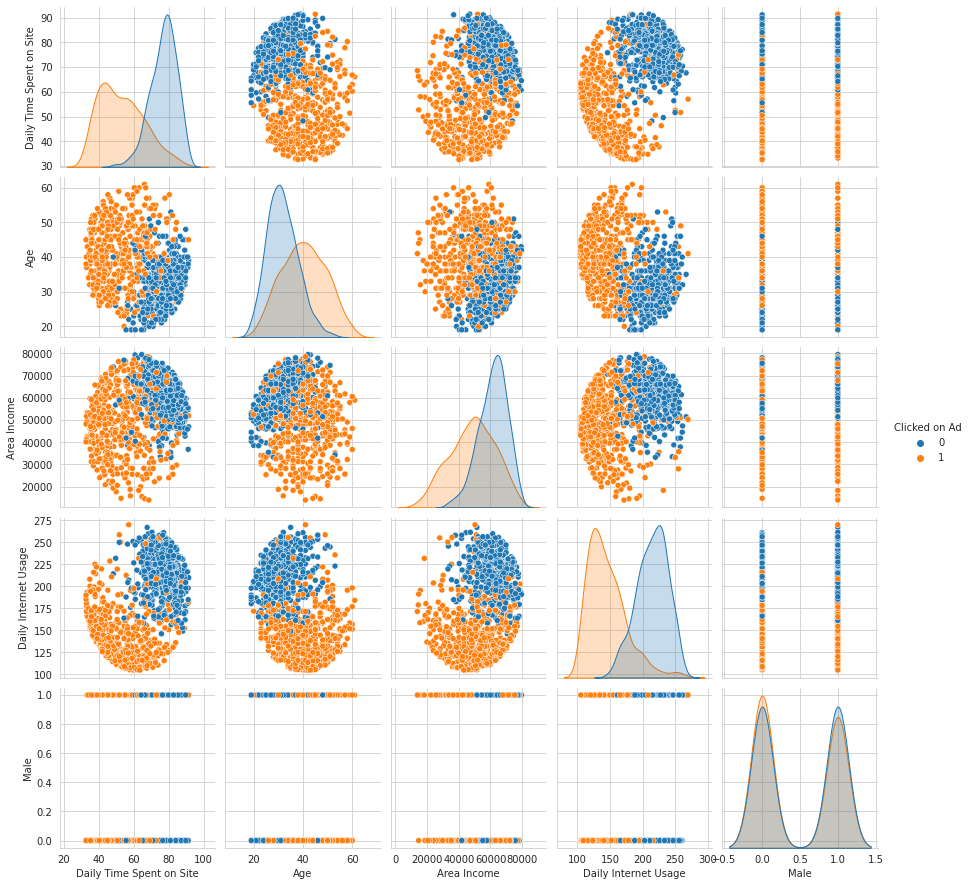

In [10]:
sns.pairplot(data=ad_data,hue='Clicked on Ad')

## Pre-processing

In [11]:
# New feature: lenght of 'Ad Topic Line'

ad_data['Ad Topic Line lenght'] = ad_data['Ad Topic Line'].apply(lambda topic_line: len(topic_line))
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Ad Topic Line lenght
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,34
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,34
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,32
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,37
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,29


In [12]:
# New feature: AM (or PM) from 'Timestamp'

ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])

def am_pm(timeStamp):
    if timeStamp.hour >= 12:
        return 'PM'
    else:
        return 'AM'
    
ad_data['AM/PM'] = ad_data['Timestamp'].apply(lambda ts: am_pm(ts))
PM = pd.get_dummies(ad_data['AM/PM'],drop_first=True)
ad_data['PM'] = PM
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Ad Topic Line lenght,AM/PM,PM
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,34,AM,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,34,AM,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,32,PM,1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,37,AM,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,29,AM,0


In [13]:
# Drop 'City', 'Ad Topic Line', 'AM/PM', 'Timestamp' and 'Country'

ad_data.drop(['City','Ad Topic Line','AM/PM','Timestamp','Country'],axis=1,inplace=True)
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Ad Topic Line lenght,PM
0,68.95,35,61833.90,256.09,0,0,34,0
1,80.23,31,68441.85,193.77,1,0,34,0
2,69.47,26,59785.94,236.50,0,0,32,1
3,74.15,29,54806.18,245.89,1,0,37,0
4,68.37,35,73889.99,225.58,0,0,29,0


## Model
### Training and Testing Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Ad Topic Line lenght,PM
0,68.95,35,61833.90,256.09,0,0,34,0
1,80.23,31,68441.85,193.77,1,0,34,0
2,69.47,26,59785.94,236.50,0,0,32,1
3,74.15,29,54806.18,245.89,1,0,37,0
4,68.37,35,73889.99,225.58,0,0,29,0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop('Clicked on Ad',axis=1), 
                                                    ad_data['Clicked on Ad'], test_size=0.40)

### Training and Predicting

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [19]:
predictions = logmodel.predict(X_test)

### Evaluating the Model

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       198
           1       0.96      0.89      0.93       202

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

